In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Setting the seeds**

In [2]:
import random
random.seed(0)
np.random.seed(0)

**Genetic Algorithm**

In [3]:
# Gene - A city is a class with x,y coordinates.
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance

    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"


# Calculating Fitness - Here we use distance as the fitness function, we will treat fitness as inverse
# of the route distance so that we can maximize the function to get
# shortest distance.

class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness = 0.0

    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance

    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [4]:
#Individual - Creating a single route based on the cities randomly

def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [5]:
# Population (A group of individuals (routes)) - We now make our initial population.
# Randomly producing the routes that satisfy the TSP conditions.

def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

# Ranking fitness - We rank each individual of the population based on how
# short the distance is

import operator

def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)


In [6]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()

    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [7]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []

    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))

    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])

    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])

    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [8]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))

            city1 = individual[swapped]
            city2 = individual[swapWith]

            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

def mutatePopulation(population, mutationRate):
    mutatedPop = []

    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [9]:
# Now we compute the next generation using the previous functions

def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    # pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1])) # Inverse to get the distane from fitness score

    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)

    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [10]:
import copy
cityList = []

for i in range(0,25):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

print(cityList)
initial_pop = initialPopulation(100, cityList)
print(initial_pop)

[(168,151), (84,51), (102,80), (156,60), (95,116), (181,100), (56,151), (123,50), (181,196), (162,180), (62,145), (179,136), (94,20), (86,122), (182,193), (95,173), (52,161), (109,2), (143,79), (164,133), (0,98), (173,48), (65,174), (38,113), (47,193)]
[[(109,2), (182,193), (102,80), (65,174), (62,145), (52,161), (95,173), (156,60), (162,180), (164,133), (179,136), (84,51), (181,196), (181,100), (94,20), (47,193), (0,98), (95,116), (143,79), (168,151), (123,50), (56,151), (86,122), (38,113), (173,48)], [(181,100), (56,151), (47,193), (84,51), (164,133), (181,196), (95,173), (102,80), (109,2), (95,116), (182,193), (52,161), (168,151), (173,48), (0,98), (38,113), (62,145), (143,79), (123,50), (179,136), (65,174), (156,60), (86,122), (162,180), (94,20)], [(95,173), (173,48), (0,98), (179,136), (102,80), (62,145), (156,60), (47,193), (164,133), (56,151), (143,79), (168,151), (38,113), (95,116), (84,51), (182,193), (181,100), (65,174), (123,50), (162,180), (86,122), (94,20), (181,196), (109

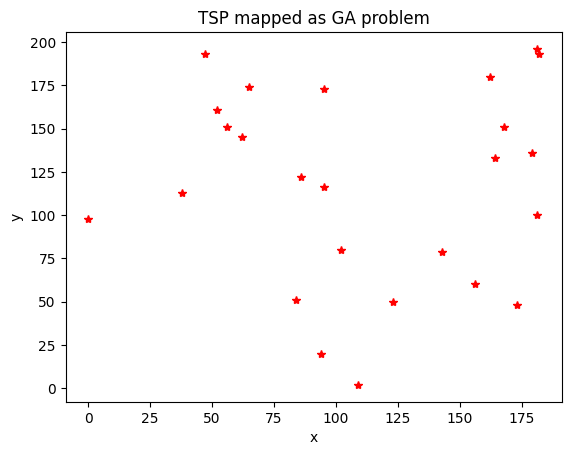

In [11]:
x = [city.x for city in cityList]
y = [city.y for city in cityList]

plt.plot(x,y,'r*')
plt.title('TSP mapped as GA problem')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:


def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations,initial_pop):
    # pop = initialPopulation(popSize, population)
    pop = copy.deepcopy(initial_pop)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])

    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])

    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()


    return bestRoute

Initial distance: 1970.5651390337189
Final distance: 804.0506549886293


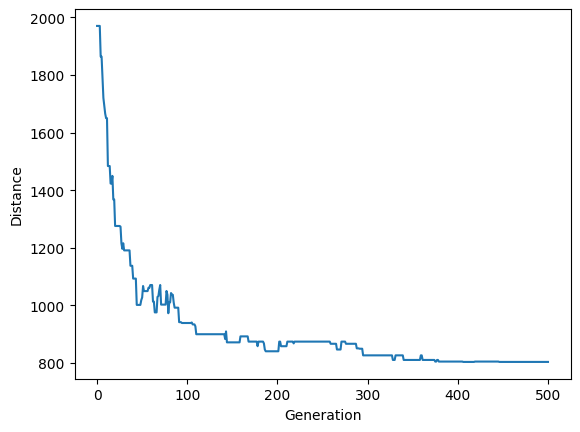

[(181,100), (179,136), (164,133), (168,151), (182,193), (181,196), (162,180), (95,173), (65,174), (47,193), (52,161), (56,151), (62,145), (0,98), (38,113), (86,122), (95,116), (102,80), (84,51), (94,20), (109,2), (123,50), (143,79), (156,60), (173,48)]


In [13]:
#geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)
bestroute = geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500,initial_pop=initial_pop)
print(bestroute)

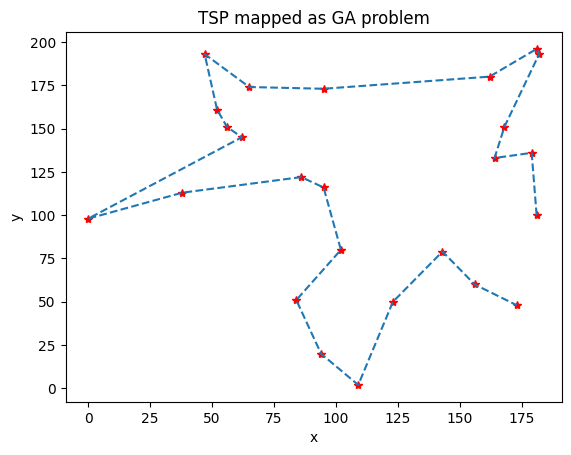

[(181,100), (179,136), (164,133), (168,151), (182,193), (181,196), (162,180), (95,173), (65,174), (47,193), (52,161), (56,151), (62,145), (0,98), (38,113), (86,122), (95,116), (102,80), (84,51), (94,20), (109,2), (123,50), (143,79), (156,60), (173,48)]


In [14]:
x = [city.x for city in cityList]
y = [city.y for city in cityList]

route_point_x = [bestroute[i].x for i in range(len(bestroute))]
route_point_y = [bestroute[i].y for i in range(len(bestroute))]

plt.plot(x,y,'r*')
plt.plot(route_point_x,route_point_y,'--')
plt.title('TSP mapped as GA problem')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(bestroute)

Initial distance: 1970.5651390337189
Final distance: 1432.7028324884186


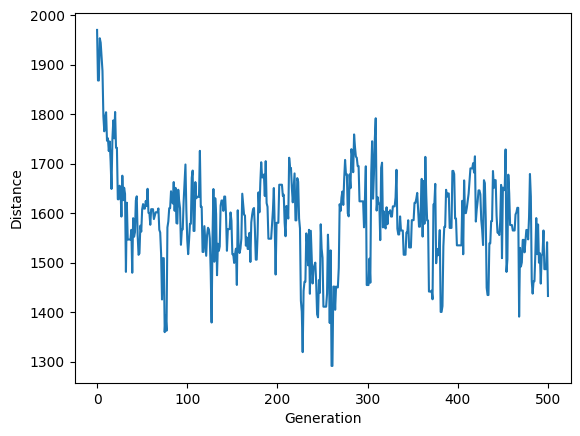

[(123,50), (84,51), (109,2), (94,20), (143,79), (173,48), (102,80), (52,161), (47,193), (65,174), (38,113), (56,151), (0,98), (95,116), (62,145), (95,173), (86,122), (182,193), (181,196), (168,151), (164,133), (179,136), (181,100), (156,60), (162,180)]


In [15]:
#geneticAlgorithm(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500)
bestroute = geneticAlgorithmPlot(population=cityList, popSize=100, eliteSize=20, mutationRate=0.05, generations=500,initial_pop=initial_pop)
print(bestroute)

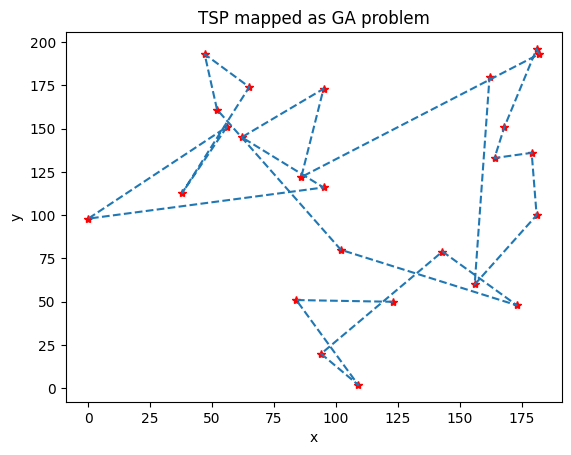

[(123,50), (84,51), (109,2), (94,20), (143,79), (173,48), (102,80), (52,161), (47,193), (65,174), (38,113), (56,151), (0,98), (95,116), (62,145), (95,173), (86,122), (182,193), (181,196), (168,151), (164,133), (179,136), (181,100), (156,60), (162,180)]


In [16]:
x = [city.x for city in cityList]
y = [city.y for city in cityList]

route_point_x = [bestroute[i].x for i in range(len(bestroute))]
route_point_y = [bestroute[i].y for i in range(len(bestroute))]

plt.plot(x,y,'r*')
plt.plot(route_point_x,route_point_y,'--')
plt.title('TSP mapped as GA problem')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(bestroute)

**Uniform CA**

In [17]:
# send the max distance of 8 or less neighbours
def find_distance(arr,popRanked):
  max_fitness = 0
  cell = -1
  for i in range(len(arr)):
    for x in range(len(popRanked)):
      if(arr[i] == popRanked[x][0]):
        distance = popRanked[x][1]
        if(distance > max_fitness):
          max_fitness = distance
          cell = popRanked[x][0]

  return max_fitness,cell

In [18]:
# popRanked = [(59, 0.0004552725835690138), (30, 0.0004420110405079155), ....]
# Ignoring the elite List
# temp_arr[i,j-1] + temp_arr[i,j+1] + temp_arr[i-1,j-1] + temp_arr[i-1,j] + temp_arr[i-1,j+1] + temp_arr[i+1,j-1] + temp_arr[i+1,j] + temp_arr[i+1,j+1]
def selection_CA(popRanked, eliteSize,population_CA_cells_null_padded,N,population_CA_name):
    selectionResults = []
    selectionResults_final = []
    for i in range(1,N+1):
      for j in range(1,N+1):
        cell_index_i = i - 1
        cell_index_j = j - 1
        if(population_CA_cells_null_padded[i][j] == 1):
          neighbors = []
          if(cell_index_i > 0 and cell_index_i < N and cell_index_j -1 > 0 and cell_index_j - 1 < N):
            neighbors.append(population_CA_name[cell_index_i][cell_index_j-1])
          if(cell_index_i > 0 and cell_index_i < N and cell_index_j + 1 > 0 and cell_index_j + 1 < N):
            neighbors.append(population_CA_name[cell_index_i][cell_index_j+1])
          if(cell_index_i - 1 > 0 and cell_index_i - 1 < N and cell_index_j - 1 > 0 and cell_index_j - 1 < N):
            neighbors.append(population_CA_name[cell_index_i-1][cell_index_j-1])
          if(cell_index_i - 1 > 0 and cell_index_i - 1 < N and cell_index_j > 0 and cell_index_j< N):
            neighbors.append(population_CA_name[cell_index_i-1][cell_index_j])
          if(cell_index_i - 1 > 0 and cell_index_i - 1 < N and cell_index_j + 1 > 0 and cell_index_j + 1 < N):
            neighbors.append(population_CA_name[cell_index_i-1][cell_index_j+1])
          if(cell_index_i + 1 > 0 and cell_index_i + 1 < N and cell_index_j - 1 > 0 and cell_index_j - 1 < N):
            neighbors.append(population_CA_name[cell_index_i+1][cell_index_j-1])
          if(cell_index_i + 1 > 0 and cell_index_i + 1 < N and cell_index_j > 0 and cell_index_j < N):
            neighbors.append(population_CA_name[cell_index_i+1][cell_index_j])
          if(cell_index_i + 1 > 0 and cell_index_i + 1 < N and cell_index_j + 1 > 0 and cell_index_j + 1 < N):
            neighbors.append(population_CA_name[cell_index_i+1][cell_index_j+1])

          maxdistance,cellname = find_distance(neighbors,popRanked)
          selectionResults.append([population_CA_name[cell_index_i][cell_index_j],cellname])

    for x in range(len(selectionResults)):
      selectionResults_final.append(selectionResults[x])

    select_length = len(selectionResults)
    required_length = 100 - len(selectionResults)

    for i in range(0,required_length):
      selectionResults_final.append(random.choice(selectionResults))

    return selectionResults_final

In [19]:
def matingPool_CA(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index_0 = selectionResults[i][0]
        index_1 = selectionResults[i][1]
        # print(index_0)
        # print(index_1)
        matingpool.append([population[index_0],population[index_1]])


    return matingpool


def breedPopulation_CA(matingpool, eliteSize):
    children = []
    length = len(matingpool)

    for i in range(0,length):
      child = breed(matingpool[i][0],matingpool[i][1])
      children.append(child)
    return children

In [20]:
#Evolve CA

def evolve_CA_rule2(population_CA_cells_null_padded,N,iterations):
  # Rule 2
  temp_arr = population_CA_cells_null_padded
  out_arr = np.zeros((N+2,N+2))
  living_cells_rule2 = []
  for itr in range(iterations):
    for i in range(1,N+1):
      for j in range(1,N+1):
        sum = temp_arr[i,j-1] + temp_arr[i,j+1] + temp_arr[i-1,j-1] + temp_arr[i-1,j] + temp_arr[i-1,j+1] + temp_arr[i+1,j-1] + temp_arr[i+1,j] + temp_arr[i+1,j+1]
        if(temp_arr[i][j] == 1):
          if(sum == 1 or sum == 2 or sum == 3 or sum == 4):
            out_arr[i,j] = 1
          else:
            out_arr[i,j] = 0
        else:
          if(sum == 4 or sum == 5 or sum == 6 or sum == 7):
            out_arr[i,j] = 1
          else:
            out_arr[i,j] = 0

    temp_arr = out_arr
    living_cells_rule2.append(np.sum(out_arr))
    out_arr = np.zeros((N+2,N+2))
  return temp_arr

In [21]:
def place_new_children(population,mutated_result,newselects,popRanked):
  count = 0
  for i in range(len(newselects)):
    index = newselects[i][0]
    orig_fitness = -1
    for x in range(len(popRanked)):
      if(index == popRanked[x][0]):
        orig_fitness = popRanked[x][1]
        break

    present_fitness = Fitness(mutated_result[i]).routeFitness()
    if(present_fitness > orig_fitness):
      population[index] = mutated_result[i]
      count+=1
  print(count, end=" ")
  return population

In [22]:
def nextGeneration_hybridCA(currentGen, eliteSize, mutationRate,population_CA_cells_null_padded,N,population_CA_name):
  popRanked = rankRoutes(currentGen)
  selectionResults = selection_CA(popRanked, eliteSize, population_CA_cells_null_padded,N,population_CA_name)
  matingpool = matingPool_CA(currentGen, selectionResults)
  children = breedPopulation_CA(matingpool, eliteSize)
  nextGeneration = mutatePopulation(children, mutationRate)
  evolve_temp_rule2 = evolve_CA_rule2(population_CA_cells_null_padded,N,1)
  return nextGeneration,selectionResults,evolve_temp_rule2,popRanked

In [23]:
np.random.seed(0)
# 0 -  987
# 32 - 985
alive_cells = []
def geneticAlgorithmPlot_HybridGA(population, popSize, eliteSize, mutationRate, generations,initial_pop):
    # pop = initialPopulation(popSize, population)
    pop = copy.deepcopy(initial_pop)
    progress = []

    N = 10
    population_CA_name = []
    for i in range(0,100,10):
      arr = []
      for x in range(0,N):
        arr.append(x+i)
        population_CA_name.append(arr)

    population_CA_name = np.array(population_CA_name)
    population_CA_cells = np.random.choice([0, 1], size=(N,N))
    population_CA_cells_null_padded =  np.pad(population_CA_cells, [(1, 1), (1, 1)], mode='constant', constant_values=0)
    alive_cells.append(np.sum(population_CA_cells_null_padded))

    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1])) # Inverse to get the distane from fitness score
    progress.append(1 / rankRoutes(pop)[0][1])

    for i in range(0, generations):
      nextGeneration,selectionResults,evolve_temp_rule2,popRanked = nextGeneration_hybridCA(pop, eliteSize, mutationRate, population_CA_cells_null_padded, N,population_CA_name)
      pop = place_new_children(pop,nextGeneration,selectionResults,popRanked)
      population_CA_cells_null_padded = copy.deepcopy(evolve_temp_rule2)
      alive_cells.append(np.sum(population_CA_cells_null_padded))
      progress.append(1 / rankRoutes(pop)[0][1])

    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    print()
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

    return bestRoute,alive_cells

Initial distance: 1970.5651390337189
70 53 47 43 28 32 18 19 11 14 10 11 11 7 12 13 8 10 5 9 15 14 9 8 10 6 4 7 5 2 3 2 4 2 2 6 5 3 6 6 5 2 1 3 6 2 3 4 3 0 2 3 2 1 2 2 1 1 2 0 1 1 2 2 0 2 0 0 0 1 0 1 2 2 1 1 1 2 2 1 2 0 3 2 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 2 1 2 2 3 1 1 1 1 0 3 1 1 0 1 5 0 1 1 1 2 0 1 0 2 1 2 0 2 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 2 1 1 1 0 0 0 1 1 1 5 0 3 1 3 2 2 1 1 1 0 0 0 0 4 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 2 3 4 2 1 2 2 4 1 0 2 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 2 0 0 1 1 0 0 1 1 3 2 1 0 1 3 1 1 2 0 1 0 0 0 0 0 1 0 2 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 1 0 2 0 0 3 1 1 0 0 0 0 0 0 0 1 0 1 0 0 4 0 0 1 1 0 0 0 3 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

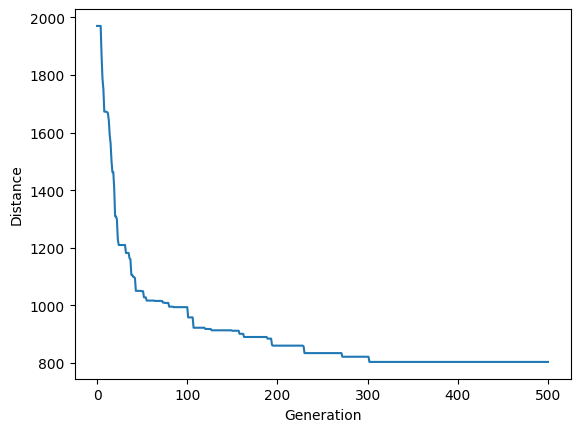

[(102,80), (84,51), (94,20), (109,2), (123,50), (143,79), (156,60), (173,48), (181,100), (179,136), (164,133), (168,151), (182,193), (181,196), (162,180), (95,173), (65,174), (47,193), (52,161), (56,151), (62,145), (0,98), (38,113), (86,122), (95,116)]


In [24]:
bestroute,alive_cells = geneticAlgorithmPlot_HybridGA(population=cityList, popSize=100, eliteSize=20, mutationRate=0.05, generations=500,initial_pop=initial_pop)
print(bestroute)

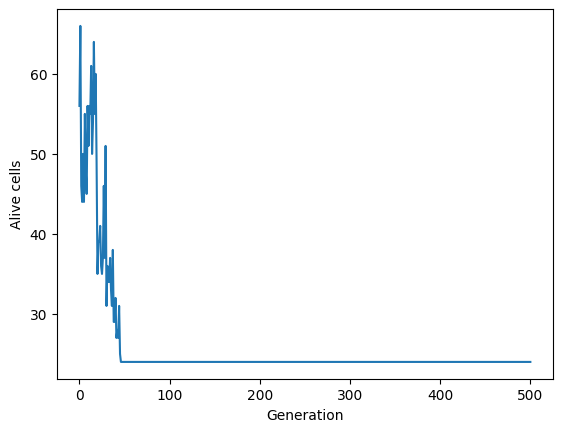

In [25]:
plt.plot(alive_cells)
plt.ylabel('Alive cells')
plt.xlabel('Generation')
plt.show()

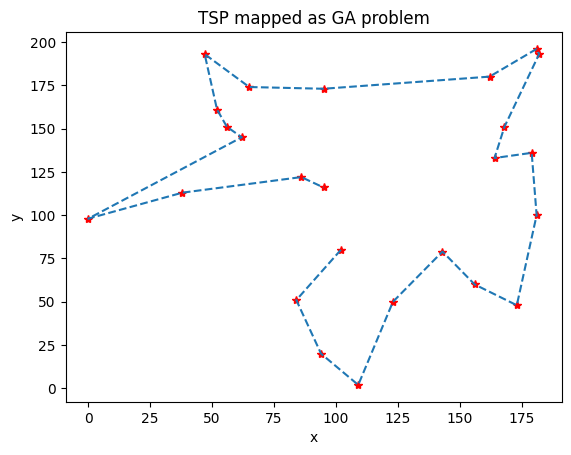

[(102,80), (84,51), (94,20), (109,2), (123,50), (143,79), (156,60), (173,48), (181,100), (179,136), (164,133), (168,151), (182,193), (181,196), (162,180), (95,173), (65,174), (47,193), (52,161), (56,151), (62,145), (0,98), (38,113), (86,122), (95,116)]


In [26]:
x = [city.x for city in cityList]
y = [city.y for city in cityList]

route_point_x = [bestroute[i].x for i in range(len(bestroute))]
route_point_y = [bestroute[i].y for i in range(len(bestroute))]

plt.plot(x,y,'r*')
plt.plot(route_point_x,route_point_y,'--')
plt.title('TSP mapped as GA problem')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(bestroute)

Initial distance: 1970.5651390337189
62 56 44 39 46 33 33 40 39 31 12 14 21 9 12 9 10 8 16 13 16 12 6 1 0 3 6 3 2 3 4 4 3 4 2 8 7 3 3 2 5 6 10 3 7 3 3 2 4 7 1 3 4 4 4 1 4 4 5 1 5 5 7 6 2 4 6 3 4 2 2 4 3 3 0 1 1 1 7 2 1 2 4 5 6 5 0 3 3 6 6 1 8 12 5 7 2 3 2 4 3 5 8 2 3 5 6 4 2 2 6 3 0 7 0 2 4 7 2 3 5 3 1 1 0 0 1 0 1 0 0 1 0 0 2 0 0 0 2 2 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 3 0 2 2 0 0 1 1 0 1 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

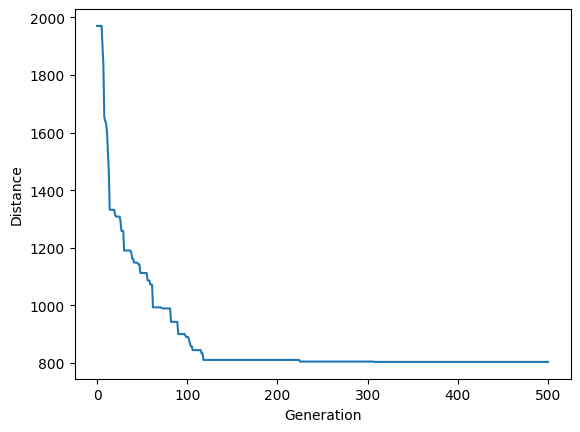

[(56,151), (52,161), (47,193), (65,174), (95,173), (162,180), (181,196), (182,193), (168,151), (164,133), (179,136), (181,100), (173,48), (156,60), (143,79), (123,50), (109,2), (94,20), (84,51), (102,80), (95,116), (86,122), (38,113), (0,98), (62,145)]


In [27]:
bestroute,alive_cells = geneticAlgorithmPlot_HybridGA(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500,initial_pop=initial_pop)
print(bestroute)

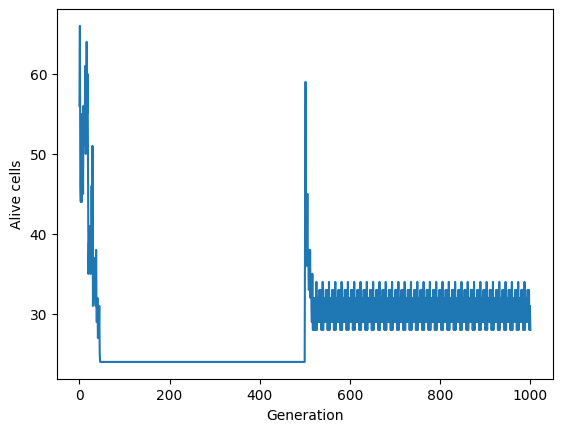

In [28]:
plt.plot(alive_cells)
plt.ylabel('Alive cells')
plt.xlabel('Generation')
plt.show()

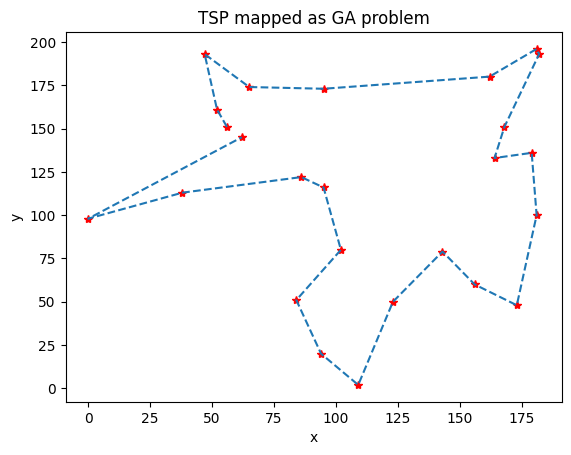

[(56,151), (52,161), (47,193), (65,174), (95,173), (162,180), (181,196), (182,193), (168,151), (164,133), (179,136), (181,100), (173,48), (156,60), (143,79), (123,50), (109,2), (94,20), (84,51), (102,80), (95,116), (86,122), (38,113), (0,98), (62,145)]


In [29]:
x = [city.x for city in cityList]
y = [city.y for city in cityList]

route_point_x = [bestroute[i].x for i in range(len(bestroute))]
route_point_y = [bestroute[i].y for i in range(len(bestroute))]

plt.plot(x,y,'r*')
plt.plot(route_point_x,route_point_y,'--')
plt.title('TSP mapped as GA problem')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(bestroute)

**Non Uniform TSP**

In [30]:
# send the max distance of 8 or less neighbours
def find_distance_NU(arr,popRanked):
  max_fitness = 0
  cell = -1
  for i in range(len(arr)):
    for x in range(len(popRanked)):
      if(arr[i] == popRanked[x][0]):
        distance = popRanked[x][1]
        if(distance > max_fitness):
          max_fitness = distance
          cell = popRanked[x][0]

  return max_fitness,cell

In [31]:
# popRanked = [(59, 0.0004552725835690138), (30, 0.0004420110405079155), ....]
# Ignoring the elite List
# temp_arr[i,j-1] + temp_arr[i,j+1] + temp_arr[i-1,j-1] + temp_arr[i-1,j] + temp_arr[i-1,j+1] + temp_arr[i+1,j-1] + temp_arr[i+1,j] + temp_arr[i+1,j+1]
def selection_CA_NU(popRanked, eliteSize,population_CA_cells_null_padded,N,population_CA_name):
    selectionResults = []
    selectionResults_final = []
    for i in range(1,N+1):
      for j in range(1,N+1):
        cell_index_i = i - 1
        cell_index_j = j - 1
        if(population_CA_cells_null_padded[i][j] == 1):
          neighbors = []
          if(cell_index_i > 0 and cell_index_i < N and cell_index_j -1 > 0 and cell_index_j - 1 < N):
            neighbors.append(population_CA_name[cell_index_i][cell_index_j-1])
          if(cell_index_i > 0 and cell_index_i < N and cell_index_j + 1 > 0 and cell_index_j + 1 < N):
            neighbors.append(population_CA_name[cell_index_i][cell_index_j+1])
          if(cell_index_i - 1 > 0 and cell_index_i - 1 < N and cell_index_j - 1 > 0 and cell_index_j - 1 < N):
            neighbors.append(population_CA_name[cell_index_i-1][cell_index_j-1])
          if(cell_index_i - 1 > 0 and cell_index_i - 1 < N and cell_index_j > 0 and cell_index_j< N):
            neighbors.append(population_CA_name[cell_index_i-1][cell_index_j])
          if(cell_index_i - 1 > 0 and cell_index_i - 1 < N and cell_index_j + 1 > 0 and cell_index_j + 1 < N):
            neighbors.append(population_CA_name[cell_index_i-1][cell_index_j+1])
          if(cell_index_i + 1 > 0 and cell_index_i + 1 < N and cell_index_j - 1 > 0 and cell_index_j - 1 < N):
            neighbors.append(population_CA_name[cell_index_i+1][cell_index_j-1])
          if(cell_index_i + 1 > 0 and cell_index_i + 1 < N and cell_index_j > 0 and cell_index_j < N):
            neighbors.append(population_CA_name[cell_index_i+1][cell_index_j])
          if(cell_index_i + 1 > 0 and cell_index_i + 1 < N and cell_index_j + 1 > 0 and cell_index_j + 1 < N):
            neighbors.append(population_CA_name[cell_index_i+1][cell_index_j+1])

          maxdistance,cellname = find_distance_NU(neighbors,popRanked)
          selectionResults.append([population_CA_name[cell_index_i][cell_index_j],cellname])

    for x in range(len(selectionResults)):
      selectionResults_final.append(selectionResults[x])

    select_length = len(selectionResults)
    required_length = 100 - len(selectionResults)

    for i in range(0,required_length):
      selectionResults_final.append(random.choice(selectionResults))

    return selectionResults_final

In [32]:
def matingPool_CA_NU(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index_0 = selectionResults[i][0]
        index_1 = selectionResults[i][1]
        # print(index_0)
        # print(index_1)
        matingpool.append([population[index_0],population[index_1]])


    return matingpool


def breedPopulation_CA_NU(matingpool, eliteSize):
    children = []
    length = len(matingpool)

    for i in range(0,length):
      child = breed(matingpool[i][0],matingpool[i][1])
      children.append(child)
    return children

In [33]:
#Evolve CA

def evolve_CA_rule3(population_CA_cells_null_padded,N,iterations,rule_matrix):
  # Rule 2
  temp_arr = population_CA_cells_null_padded
  out_arr = np.zeros((N+2,N+2))
  living_cells_rule2 = []
  for itr in range(iterations):
    for i in range(1,N+1):
      for j in range(1,N+1):
        sum = temp_arr[i,j-1] + temp_arr[i,j+1] + temp_arr[i-1,j-1] + temp_arr[i-1,j] + temp_arr[i-1,j+1] + temp_arr[i+1,j-1] + temp_arr[i+1,j] + temp_arr[i+1,j+1]
        if(rule_matrix[i-1][j-1] == 1):
          if(temp_arr[i][j] == 1):
            if(sum == 2 or sum == 3):
              out_arr[i,j] = 1
            else:
              out_arr[i,j] = 0
          else:
            if(sum == 3):
              out_arr[i,j] = 1
            else:
              out_arr[i,j] = 0

        elif(rule_matrix[i-1][j-1] == 2):
          if(temp_arr[i][j] == 1):
            if(sum == 1 or sum == 2 or sum == 3 or sum == 4):
              out_arr[i,j] = 1
            else:
              out_arr[i,j] = 0
          else:
            if(sum == 4 or sum == 5 or sum == 6 or sum == 7):
              out_arr[i,j] = 1
            else:
              out_arr[i,j] = 0

        else:
          if(temp_arr[i][j] == 1):
            if(sum == 2 or sum == 4 or sum == 6 or sum == 8):
              out_arr[i,j] = 1
            else:
              out_arr[i,j] = 0
          else:
            if(sum == 1 or sum == 3 or sum == 5 or sum == 7):
              out_arr[i,j] = 1
            else:
              out_arr[i,j] = 0

    temp_arr = out_arr
    living_cells_rule2.append(np.sum(out_arr))
    out_arr = np.zeros((N+2,N+2))
  return temp_arr

In [34]:
from scipy.optimize import dual_annealing
def place_new_children_NU(population,mutated_result,newselects,popRanked):
  count = 0
  for i in range(len(newselects)):
    index = newselects[i][0]
    orig_fitness = -1
    for x in range(len(popRanked)):
      if(index == popRanked[x][0]):
        orig_fitness = popRanked[x][1]
        break

    present_fitness = Fitness(mutated_result[i]).routeFitness()
    if(present_fitness > orig_fitness):
      population[index] = mutated_result[i]
      count+=1
  print(count,end=" ")
  return population

In [35]:
def nextGeneration_hybridCA_NU(currentGen, eliteSize, mutationRate,population_CA_cells_null_padded,N,population_CA_name,rule_matrix):
  popRanked = rankRoutes(currentGen)
  selectionResults = selection_CA_NU(popRanked, eliteSize, population_CA_cells_null_padded,N,population_CA_name)
  matingpool = matingPool_CA_NU(currentGen, selectionResults)
  children = breedPopulation_CA_NU(matingpool, eliteSize)
  nextGeneration = mutatePopulation(children, mutationRate)
  evolve_temp_rule2 = evolve_CA_rule3(population_CA_cells_null_padded,N,1,rule_matrix)
  return nextGeneration,selectionResults,evolve_temp_rule2,popRanked

In [36]:
np.random.seed(0)
# 0 -  987
# 32 - 985
alive_cells = []
def geneticAlgorithmPlot_HybridGA_NU(population, popSize, eliteSize, mutationRate, generations,initial_pop):
    # pop = initialPopulation(popSize, population)
    pop = copy.deepcopy(initial_pop)
    progress = []

    N = 10
    population_CA_name = []
    for i in range(0,100,10):
      arr = []
      for x in range(0,N):
        arr.append(x+i)
        population_CA_name.append(arr)

    population_CA_name = np.array(population_CA_name)
    population_CA_cells = np.random.choice([0, 1], size=(N,N))
    rule_matrix = np.random.choice([1,2,3],size=(N,N))
    population_CA_cells_null_padded =  np.pad(population_CA_cells, [(1, 1), (1, 1)], mode='constant', constant_values=0)
    alive_cells.append(np.sum(population_CA_cells_null_padded))

    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1])) # Inverse to get the distane from fitness score
    progress.append(1 / rankRoutes(pop)[0][1])

    for i in range(0, generations):
      nextGeneration,selectionResults,evolve_temp_rule2,popRanked = nextGeneration_hybridCA_NU(pop, eliteSize, mutationRate, population_CA_cells_null_padded, N,population_CA_name,rule_matrix)
      pop = place_new_children_NU(pop,nextGeneration,selectionResults,popRanked)
      population_CA_cells_null_padded = copy.deepcopy(evolve_temp_rule2)
      alive_cells.append(np.sum(population_CA_cells_null_padded))
      progress.append(1 / rankRoutes(pop)[0][1])

    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    print()
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    print(progress)
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

    return bestRoute,alive_cells

Initial distance: 1970.5651390337189
73 52 44 39 36 31 38 26 30 20 27 28 26 24 18 29 29 16 15 13 16 18 12 11 7 5 9 12 5 5 7 3 6 6 7 4 8 2 6 7 4 7 1 3 8 5 3 1 2 0 2 0 2 2 1 0 2 0 0 0 0 0 0 1 0 0 0 0 0 1 2 0 1 0 1 1 3 5 3 2 1 2 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 0 0 1 1 0 0 0 1 1 1 1 0 1 3 0 2 0 2 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 1 0 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 1 1 1 2 0 1 0 0 2 0 0 3 0 2 0 1 3 2 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 2 2 1 0 0 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 0 1 2 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 

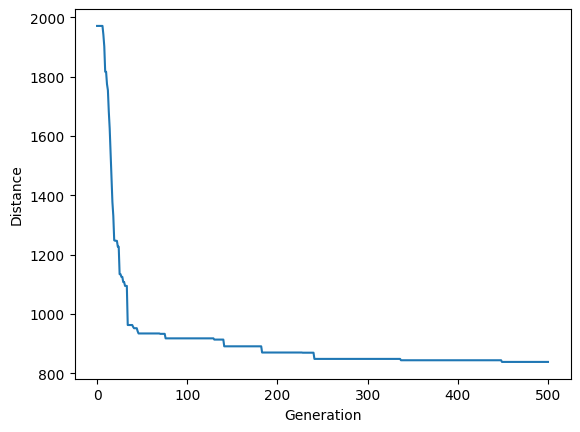

[(56,151), (52,161), (47,193), (65,174), (95,173), (168,151), (162,180), (181,196), (182,193), (179,136), (164,133), (181,100), (173,48), (156,60), (143,79), (123,50), (109,2), (94,20), (84,51), (102,80), (95,116), (86,122), (38,113), (0,98), (62,145)]


In [37]:
bestroute,alive_cells = geneticAlgorithmPlot_HybridGA_NU(population=cityList, popSize=100, eliteSize=20, mutationRate=0.01, generations=500,initial_pop=initial_pop)
print(bestroute)

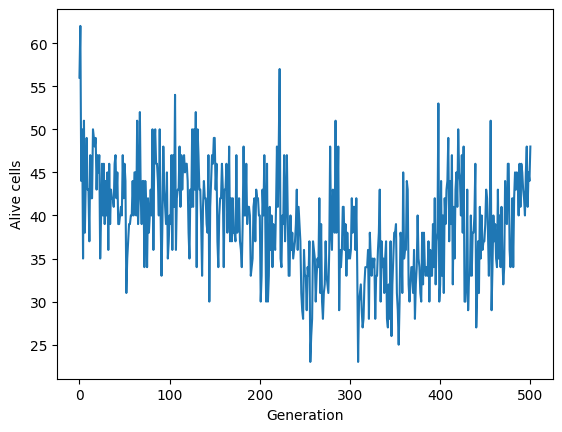

In [38]:
plt.plot(alive_cells)
plt.ylabel('Alive cells')
plt.xlabel('Generation')
plt.show()

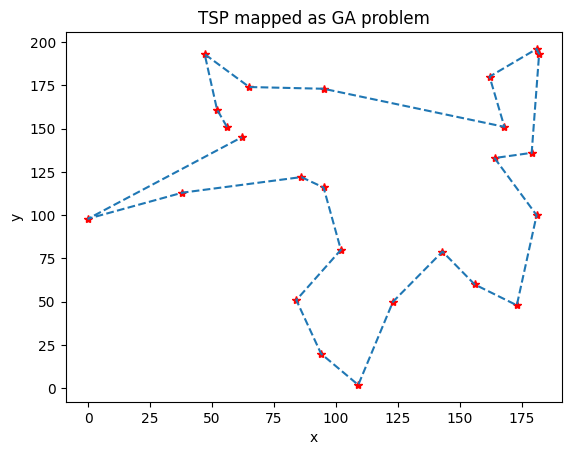

[(56,151), (52,161), (47,193), (65,174), (95,173), (168,151), (162,180), (181,196), (182,193), (179,136), (164,133), (181,100), (173,48), (156,60), (143,79), (123,50), (109,2), (94,20), (84,51), (102,80), (95,116), (86,122), (38,113), (0,98), (62,145)]


In [39]:
x = [city.x for city in cityList]
y = [city.y for city in cityList]

route_point_x = [bestroute[i].x for i in range(len(bestroute))]
route_point_y = [bestroute[i].y for i in range(len(bestroute))]

plt.plot(x,y,'r*')
plt.plot(route_point_x,route_point_y,'--')
plt.title('TSP mapped as GA problem')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(bestroute)

Initial distance: 1970.5651390337189
62 60 57 42 38 37 27 22 30 16 17 16 8 4 9 9 8 4 5 6 7 2 4 5 3 5 3 3 1 2 1 4 1 2 6 2 1 1 0 4 2 1 0 1 1 0 2 1 3 3 1 2 2 1 2 2 2 2 0 0 2 3 0 0 2 3 1 0 0 2 2 3 1 3 1 0 0 0 1 1 0 2 2 1 0 0 0 0 3 2 1 0 1 0 0 0 0 0 0 0 0 1 1 2 2 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 1 0 0 0 1 2 1 2 0 1 0 0 0 0 1 0 0 0 0 0 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 0 0 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0

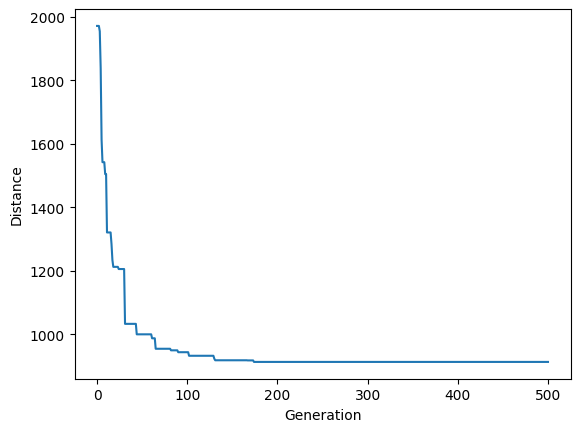

[(168,151), (162,180), (181,196), (182,193), (179,136), (181,100), (173,48), (156,60), (143,79), (123,50), (109,2), (94,20), (84,51), (102,80), (95,116), (38,113), (0,98), (47,193), (95,173), (65,174), (52,161), (56,151), (62,145), (86,122), (164,133)]


In [40]:
bestroute,alive_cells = geneticAlgorithmPlot_HybridGA(population=cityList, popSize=100, eliteSize=20, mutationRate=0.05, generations=500,initial_pop=initial_pop)
print(bestroute)

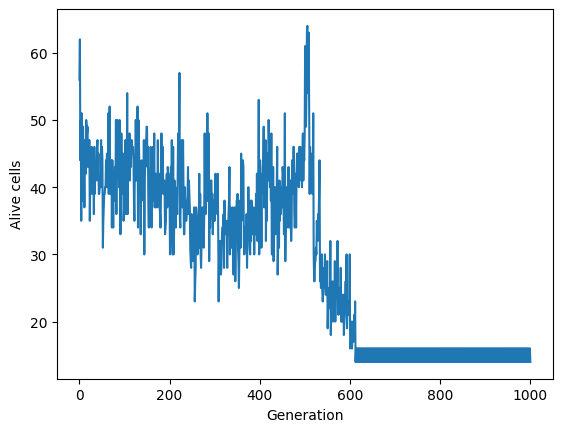

In [41]:
plt.plot(alive_cells)
plt.ylabel('Alive cells')
plt.xlabel('Generation')
plt.show()

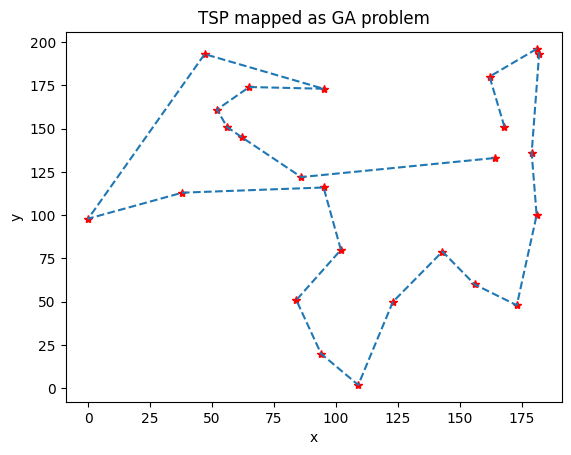

[(168,151), (162,180), (181,196), (182,193), (179,136), (181,100), (173,48), (156,60), (143,79), (123,50), (109,2), (94,20), (84,51), (102,80), (95,116), (38,113), (0,98), (47,193), (95,173), (65,174), (52,161), (56,151), (62,145), (86,122), (164,133)]


In [42]:
x = [city.x for city in cityList]
y = [city.y for city in cityList]

route_point_x = [bestroute[i].x for i in range(len(bestroute))]
route_point_y = [bestroute[i].y for i in range(len(bestroute))]

plt.plot(x,y,'r*')
plt.plot(route_point_x,route_point_y,'--')
plt.title('TSP mapped as GA problem')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

print(bestroute)